In [188]:
#Import in all necessary Libraries: 
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')  #just selected a specific style-type for visuals
from matplotlib.pyplot import figure

%matplotlib inline            
#'inline' just ensures Jupyter Notebooks DISPLAY the plots directly within the notebooks interface
matplotlib.rcParams['figure.figsize'] = (12,8) 
#ensures SIZE of Plots FITS BETTER and is configured properly (not necessary, but makes visuals look nicer!)



In [162]:
#read the csv data into a pandas Data Frame:
df = pd.read_csv(r'C:\Users\Ezhan Khan\Documents\CAPSTONE PROJECTS\Python Portfolio Projects\Movie_Industry_Dataset.csv')

In [164]:
#Viewing the Data:
df.head()
#here, will be interested in investigating relationships (correlations) between 'gross' revenue and other fields in the dataset

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [165]:
#                   Before any analysis, need to CLEAN the Dataset

#1. Check EACH Column for Missing (NULL) Data:
#COUNT the Number of NULL Values for EACH COLUMN:
missing_data = df.isnull()
missing_data.head()
for column in missing_data.columns.values:
    print(column)
    print(missing_data[column].value_counts())
    print("")   
#neatly lists the COUNT of Values ('True=Null' and 'False=non-null') for EACH Column 


name
False    5421
Name: name, dtype: int64

rating
False    5421
Name: rating, dtype: int64

genre
False    5421
Name: genre, dtype: int64

year
False    5421
Name: year, dtype: int64

released
False    5421
Name: released, dtype: int64

score
False    5421
Name: score, dtype: int64

votes
False    5421
Name: votes, dtype: int64

director
False    5421
Name: director, dtype: int64

writer
False    5421
Name: writer, dtype: int64

star
False    5421
Name: star, dtype: int64

country
False    5421
Name: country, dtype: int64

budget
False    5421
Name: budget, dtype: int64

gross
False    5421
Name: gross, dtype: int64

company
False    5421
Name: company, dtype: int64

runtime
False    5421
Name: runtime, dtype: int64



In [166]:
#Another Method to check for missing data:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())  #find missing data
    print(f'{col} - {pct_missing}%')  #for each column, as f-string
    
#No Null Values in any columns - good!

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [167]:
#Viewing the Data Types in all Columns of the Data Frame:
df.dtypes
#(may need to convert any data types which were not converted properly when reading in the file)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [168]:
#see that 'budget' and 'gross' are both integer (int64) data types, so dont have to change (good).
#(if 'float64' data type, would just use .astype() to convert to 'int64'
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


#'Year' (of release) and 'released' (date released) SHOULD match, based on Year value. 
#Better to Create a NEW 'Year' COLUMN (since the one given may not always be accurate):
#(NOTE - could also do this in Excel or Power Query, using 'Find and Replace' with Wildcard * - much easier way!)

#'released' column is an 'object' (string), given as 'Month Day, Year' format
#ONLY interested in slicing the 'Year' portion, so use '.str[-5:]' to obtain LAST 4 Characters (YYYY)
df[['release_year']] = df['released'].astype(str).str[-4:]
#remove any unecessary whitespace (if present):
df['release_year'] = df['release_year'].str.strip() 
#Convert into int64 data type (year is 'whole number', not 'object/string' anymore):
df['release_year'] = df['release_year'].astype('int64')
#use '.value_counts' to look over the year values, ensuring each is correct:
df['release_year'].value_counts()
#(could also use .unique() method to list all unique values in the column)


2011    170
2002    169
2003    168
2008    167
2000    166
2009    166
2007    165
2015    163
2010    162
2006    162
2014    161
2013    161
2001    159
2005    159
1999    159
2004    159
2016    158
2012    158
1998    148
1997    147
2017    146
2018    144
1996    143
1995    139
1993    134
1994    134
1992    124
2019    121
1989    121
1988    120
1991    116
1990    108
1987    104
1986     98
1985     96
1984     88
1983     86
1982     71
1981     54
1980     36
2020     11
Name: release_year, dtype: int64

In [169]:
#Order the Data by 'gross' revenue column (see which film has the highest gross):
df.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
3731,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,2009,"January 15, 2015",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
1378,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
2286,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
154,Parasite,R,Horror,1982,"March 12, 1982",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [170]:
#Change settings so that ALL ROWS are displayed when calling above:
pd.set_option('display.max_rows', 50)

In [171]:
#VIEW and then REMOVE DUPLICATE ROWS:
duplicate_rows = df[df.duplicated()]
duplicate_rows     
#If there were duplciates, would use following to remove:
df = df.drop_duplicates()
duplicate_rows     #NO Duplicate Rows - Good.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year


In [172]:
#Now, can start looking into Fields which could potentially have a Correlation with 'gross'
#Initial Predictions:
# 'budget' will have High Correlation
# 'company' will have High Correlation

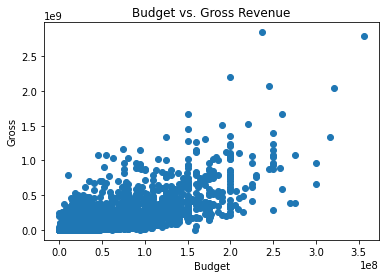

In [173]:
                          # 'budget vs gross'
#Scatter Plot
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs. Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross")  
plt.show()
#can definitely see a positive correlation - as budget increase, have a noticable increase in gross 

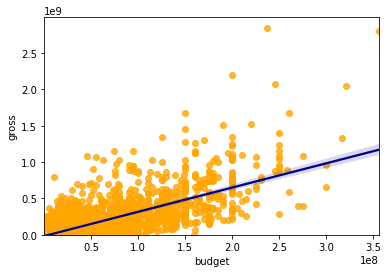

In [174]:
#This can be better visualised using a Regression Plot (including Regression Line for fit)
sns.regplot(x='budget', y='gross', data=df, line_kws = {"color":"darkblue"}, color='orange')
plt.ylim(0,)       
plt.show()
#regression line helps show the posiive correlation

In [175]:
#Obtain Quantitative value for Correlation using '.corr()' (Correlation Matrix):
df.corr()   #correlations between each NUMERICAL column of dataframe with each other
#There is a High Positive Correlation of '0.7402' between budget and gross
#this is 'Pearson Correlation'. Also get Kendall and Spearman correlations (different methods)

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
release_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [176]:
#Kendall Correlation:
df.corr(method = 'kendall')
#budget vs gross correlation is now given as '0.512' (lower)
#here, will stick to default 'Pearson' correlation, but need to be aware of WHICH METHOD is being used.

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
release_year,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


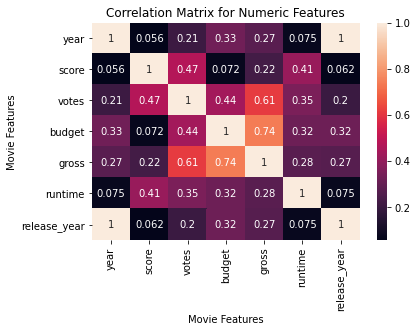

In [177]:
#Visualising the Correlation Matrix as a HEAT MAP:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")  
plt.show()
#ADDS the LABELS to AXES and also DATA LABELS inside the Heat Map
#legend shows that black = very low correlation, beige/lightorange = very high correlation
#even clearer that 'budget' is highly correlated with 'gross'

In [158]:
                       # 'company vs gross'                     

#Note - 'company' is NON-Numeric Column (string)
#so? need to NUMERICALLY REPRESENT this field, assigning NUMBER to EACH Unique Value
df['company'].value_counts()

df_numeric = df
#Use LOOP to CONVERT 'string (object)' types TO 'category' type
#then, assign numerical values to the categories using 'cat.codes'
for col in df_numeric.columns.values:
    if df_numeric[col].dtype == 'object':
        df_numeric[col] = df_numeric[col].astype('category')
        df_numeric[col] = df_numeric[col].cat.codes
#now, each 'categorical' column should be assinged number values:
df.head()    
    


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,4692,6,6,1980,1242,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1068,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1291,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1068,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1111,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,415,6,0,2020,865,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,2020
5417,3556,4,0,2020,679,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,2020
5418,1153,4,1,2020,865,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,2020
5419,3978,4,1,2020,723,6.8,42000,294,2091,640,6,135000000,111105497,12,100,2020


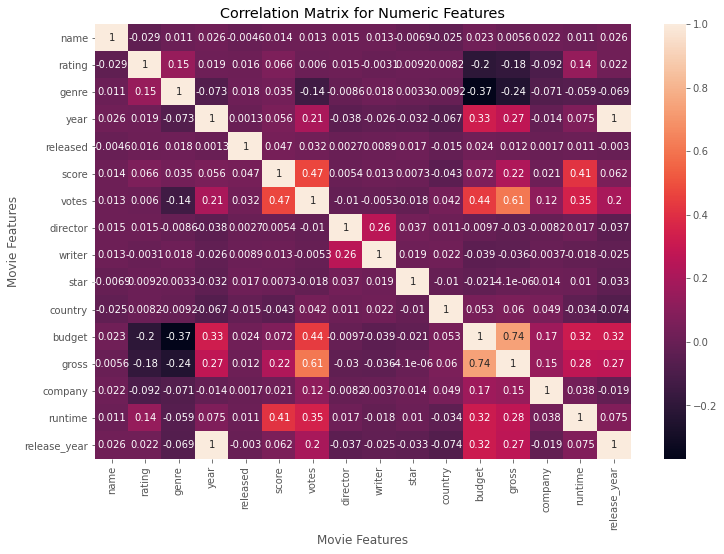

In [190]:
#Visualizing this dataframe with categories converted to numeric:
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")  
plt.show()


In [ ]:
#Observations:
#- films with longer 'runtimes' appear to somewhat make more money, but has relatively weak correlation with gross (0.28)
# -films with higher 'votes' can also lead to higher gross, has stronger correlation (0.61)

In [208]:
#Viewing the Correlation Matrix (when not visualized as heat map)
df_numeric.corr()
#Can ORGANIZE this to MORE EASILY IDENTIFY features with HIGH CORRELATIONS:
#need to UNSTACK (convert matrix into 'list' for each field), then SORT
correlation_mat = df_numeric.corr()
corr_pairs = correlation_mat.unstack()
#then, sort from highest correlation to lowest (even clearer!)
sorted_pairs = corr_pairs.sort_values(ascending=False)
print(sorted_pairs)

name     name       1.000000
rating   rating     1.000000
runtime  runtime    1.000000
company  company    1.000000
gross    gross      1.000000
                      ...   
budget   rating    -0.203946
gross    genre     -0.244101
genre    gross     -0.244101
budget   genre     -0.368523
genre    budget    -0.368523
Length: 256, dtype: float64


In [218]:
high_correlations = sorted_pairs[(sorted_pairs) > 0.5][(sorted_pairs)!=1]   #WHERE sorted_pairs value is ABOVE 0.5
print(high_correlations)     #dont want where equal to 1 too (since this is correlation of variables with THEMSELVES, which is NOT IMPORTANT)

low_correlations = sorted_pairs[(sorted_pairs)<0.5][(sorted_pairs)>0]
print(low_correlations)

release_year  year            0.998726
year          release_year    0.998726
budget        gross           0.740247
gross         budget          0.740247
              votes           0.614751
votes         gross           0.614751
dtype: float64
score     votes       0.474256
votes     score       0.474256
budget    votes       0.439675
votes     budget      0.439675
score     runtime     0.414068
                        ...   
director  released    0.002662
company   released    0.001675
released  company     0.001675
year      released    0.001345
released  year        0.001345
Length: 146, dtype: float64


In [221]:
#Overall, 'Votes' and 'Budget' have the highest correlation to 'gross' earnings.
#On the other hand, 'company' has low correlation with 'gross' (0.15)